# Product Matching Book Analysis Using K-means
### Kelompok 13
1. Yolanda R.M Manurung (12S17017)
2. Stella Sitinjak      (12S17027)
3. Ekis Naomi Lasma     (12S17059)


### Dataset
Data yang digunakan pada proyek ini berasal dari kaggle (https://www.kaggle.com/gapple/goodreads-book-reviews-20k)

# Cross Industry Standard Process for Data Mining

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import re
import gensim
from gensim.models import Word2Vec
import numpy as np
from scipy import linalg
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
%matplotlib inline

## 1. Data Understanding

In [3]:
data = pd.read_csv("./all_data.csv")
print ('Banyak data =', len(data))
data.head()

Banyak data = 21559


,book_title,Book_series,book_series_url,book_image,book_image_url,book_rating,book_author,author_url,genre,reviewer_name,reviewer_url,reviewer_image,reviewer_image_url,review,ID
0,A Court of Wings and Ruin,(A Court of Thorns and Roses #3),https://www.goodreads.com/series/104014-a-cour...,https://images.gr-assets.com/books/1485528243l...,https://www.goodreads.com/book/photo/23766634-...,4.51,Sarah J. Maas,https://www.goodreads.com/author/show/3433047....,"Fantasy, Romance, Young Adult, New Adult",emma,https://www.goodreads.com/user/show/32879029-emma,https://images.gr-assets.com/users/1520568130p...,https://www.goodreads.com/user/show/32879029-emma,202.\r\nThat’s the number of times that the wo...,1
1,A Court of Wings and Ruin,(A Court of Thorns and Roses #3),https://www.goodreads.com/series/104014-a-cour...,https://images.gr-assets.com/books/1485528243l...,https://www.goodreads.com/book/photo/23766634-...,4.51,Sarah J. Maas,https://www.goodreads.com/author/show/3433047....,"Fantasy, Romance, Young Adult, New Adult",Em (RunawayWithDreamthieves),https://www.goodreads.com/user/show/42130592-e...,https://images.gr-assets.com/users/1538507799p...,https://www.goodreads.com/user/show/42130592-e...,I need a black silk robe and a balcony to wear...,2
2,A Court of Wings and Ruin,(A Court of Thorns and Roses #3),https://www.goodreads.com/series/104014-a-cour...,https://images.gr-assets.com/books/1485528243l...,https://www.goodreads.com/book/photo/23766634-...,4.51,Sarah J. Maas,https://www.goodreads.com/author/show/3433047....,"Fantasy, Romance, Young Adult, New Adult",Cait • A Page with a View,https://www.goodreads.com/user/show/47412532-c...,https://images.gr-assets.com/users/1523134490p...,https://www.goodreads.com/user/show/47412532-c...,THIS BOOK TOTALLY WRECKED ME. In the best poss...,3
3,A Court of Wings and Ruin,(A Court of Thorns and Roses #3),https://www.goodreads.com/series/104014-a-cour...,https://images.gr-assets.com/books/1485528243l...,https://www.goodreads.com/book/photo/23766634-...,4.51,Sarah J. Maas,https://www.goodreads.com/author/show/3433047....,"Fantasy, Romance, Young Adult, New Adult",Natalie Monroe,https://www.goodreads.com/user/show/6688207-na...,https://images.gr-assets.com/users/1339730817p...,https://www.goodreads.com/user/show/6688207-na...,"3.75 stars\r\n""Rhys stepped off the stairs and...",4
4,A Court of Wings and Ruin,(A Court of Thorns and Roses #3),https://www.goodreads.com/series/104014-a-cour...,https://images.gr-assets.com/books/1485528243l...,https://www.goodreads.com/book/photo/23766634-...,4.51,Sarah J. Maas,https://www.goodreads.com/author/show/3433047....,"Fantasy, Romance, Young Adult, New Adult",Emily May,https://www.goodreads.com/user/show/4622890-em...,https://images.gr-assets.com/users/1528390751p...,https://www.goodreads.com/user/show/4622890-em...,I wish so much that I could tell you I loved t...,5


#### Check Null Value

In [4]:
data.isnull().sum()

book_title                0
Book_series           12779
book_series_url       12779
book_image                2
book_image_url            2
book_rating               0
book_author               0
author_url                0
genre                   121
reviewer_name            25
reviewer_url             25
reviewer_image           25
reviewer_image_url       25
review                  742
ID                        0
dtype: int64

In [5]:
data['Book_series'] = data['Book_series'].fillna(data['Book_series'].mode().iloc[0])
data['book_series_url'] = data['book_series_url'].fillna(data['book_series_url'].mode().iloc[0])
data['book_image'] = data['book_image'].fillna(data['book_image'].mode().iloc[0])
data['book_image_url'] = data['book_image_url'].fillna(data['book_image_url'].mode().iloc[0])
data['genre'] = data['genre'].fillna(data['genre'].mode().iloc[0])
data['reviewer_name'] = data['reviewer_name'].fillna(data['reviewer_name'].mode().iloc[0])
data['reviewer_url'] = data['reviewer_url'].fillna(data['reviewer_url'].mode().iloc[0])
data['reviewer_image'] = data['reviewer_image'].fillna(data['reviewer_image'].mode().iloc[0])
data['reviewer_image_url'] = data['reviewer_image_url'].fillna(data['reviewer_image_url'].mode().iloc[0])
data['review'] = data['review'].fillna(data['review'].mode().iloc[0])

In [6]:
data.isnull().sum()

book_title            0
Book_series           0
book_series_url       0
book_image            0
book_image_url        0
book_rating           0
book_author           0
author_url            0
genre                 0
reviewer_name         0
reviewer_url          0
reviewer_image        0
reviewer_image_url    0
review                0
ID                    0
dtype: int64

#### Check Duplicate Value

In [7]:
data.duplicated().sum()

0

In [8]:
data['book_title'].drop_duplicates(keep=False,inplace=True)
data.head()

,book_title,Book_series,book_series_url,book_image,book_image_url,book_rating,book_author,author_url,genre,reviewer_name,reviewer_url,reviewer_image,reviewer_image_url,review,ID
0,A Court of Wings and Ruin,(A Court of Thorns and Roses #3),https://www.goodreads.com/series/104014-a-cour...,https://images.gr-assets.com/books/1485528243l...,https://www.goodreads.com/book/photo/23766634-...,4.51,Sarah J. Maas,https://www.goodreads.com/author/show/3433047....,"Fantasy, Romance, Young Adult, New Adult",emma,https://www.goodreads.com/user/show/32879029-emma,https://images.gr-assets.com/users/1520568130p...,https://www.goodreads.com/user/show/32879029-emma,202.\r\nThat’s the number of times that the wo...,1
1,A Court of Wings and Ruin,(A Court of Thorns and Roses #3),https://www.goodreads.com/series/104014-a-cour...,https://images.gr-assets.com/books/1485528243l...,https://www.goodreads.com/book/photo/23766634-...,4.51,Sarah J. Maas,https://www.goodreads.com/author/show/3433047....,"Fantasy, Romance, Young Adult, New Adult",Em (RunawayWithDreamthieves),https://www.goodreads.com/user/show/42130592-e...,https://images.gr-assets.com/users/1538507799p...,https://www.goodreads.com/user/show/42130592-e...,I need a black silk robe and a balcony to wear...,2
2,A Court of Wings and Ruin,(A Court of Thorns and Roses #3),https://www.goodreads.com/series/104014-a-cour...,https://images.gr-assets.com/books/1485528243l...,https://www.goodreads.com/book/photo/23766634-...,4.51,Sarah J. Maas,https://www.goodreads.com/author/show/3433047....,"Fantasy, Romance, Young Adult, New Adult",Cait • A Page with a View,https://www.goodreads.com/user/show/47412532-c...,https://images.gr-assets.com/users/1523134490p...,https://www.goodreads.com/user/show/47412532-c...,THIS BOOK TOTALLY WRECKED ME. In the best poss...,3
3,A Court of Wings and Ruin,(A Court of Thorns and Roses #3),https://www.goodreads.com/series/104014-a-cour...,https://images.gr-assets.com/books/1485528243l...,https://www.goodreads.com/book/photo/23766634-...,4.51,Sarah J. Maas,https://www.goodreads.com/author/show/3433047....,"Fantasy, Romance, Young Adult, New Adult",Natalie Monroe,https://www.goodreads.com/user/show/6688207-na...,https://images.gr-assets.com/users/1339730817p...,https://www.goodreads.com/user/show/6688207-na...,"3.75 stars\r\n""Rhys stepped off the stairs and...",4
4,A Court of Wings and Ruin,(A Court of Thorns and Roses #3),https://www.goodreads.com/series/104014-a-cour...,https://images.gr-assets.com/books/1485528243l...,https://www.goodreads.com/book/photo/23766634-...,4.51,Sarah J. Maas,https://www.goodreads.com/author/show/3433047....,"Fantasy, Romance, Young Adult, New Adult",Emily May,https://www.goodreads.com/user/show/4622890-em...,https://images.gr-assets.com/users/1528390751p...,https://www.goodreads.com/user/show/4622890-em...,I wish so much that I could tell you I loved t...,5


# 2. Business Understanding

1. Bagaimana rata-rata rating buku dalam kategori genre tertentu?

In [9]:
byrating = data.groupby('genre')
byrating['book_rating'].mean()

genre
Adult Fiction                                                                                              4.040
Adult Fiction, Erotica, Bdsm, Dark, Romance, Contemporary, Did Not Finish                                  3.990
Adult Fiction, Erotica, Romance, Bdsm, Contemporary                                                        3.610
Adult Fiction, Erotica, War, Military Fiction                                                              3.830
Anthologies, Adult Fiction, Erotica, Romance, Novella                                                      4.060
                                                                                                           ...  
Young Adult, Science Fiction, Dystopia, Science Fiction, Horror, Zombies, Apocalyptic, Post Apocalyptic    3.960
Young Adult, Science Fiction, Fantasy                                                                      4.075
Young Adult, Science Fiction, Fantasy, Dystopia                                           

2. Bagaimana rating buku yang ditulis dari author? 

In [10]:
byratingsauthor = data.groupby('book_author')
byratingsauthor['book_rating'].mean()

book_author
A.L. Jackson            4.390000
Abbi Glines             3.853729
Abby Stern              3.320000
Adam Alter              3.820000
Adam M. Grant           3.890000
                          ...   
William Kent Krueger    3.990000
Willow Winters          3.880000
Zachary Mason           3.680000
Zara Ramm               4.440000
村上 春樹                   4.080000
Name: book_rating, Length: 646, dtype: float64

## 3. Data Preparation

In [11]:
data.shape

(21559, 15)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21559 entries, 0 to 21558
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   book_title          21559 non-null  object 
 1   Book_series         21559 non-null  object 
 2   book_series_url     21559 non-null  object 
 3   book_image          21559 non-null  object 
 4   book_image_url      21559 non-null  object 
 5   book_rating         21559 non-null  float64
 6   book_author         21559 non-null  object 
 7   author_url          21559 non-null  object 
 8   genre               21559 non-null  object 
 9   reviewer_name       21559 non-null  object 
 10  reviewer_url        21559 non-null  object 
 11  reviewer_image      21559 non-null  object 
 12  reviewer_image_url  21559 non-null  object 
 13  review              21559 non-null  object 
 14  ID                  21559 non-null  int64  
dtypes: float64(1), int64(1), object(13)
memory usage: 2.5

In [13]:
data['review'].head()

0    202.\r\nThat’s the number of times that the wo...
1    I need a black silk robe and a balcony to wear...
2    THIS BOOK TOTALLY WRECKED ME. In the best poss...
3    3.75 stars\r\n"Rhys stepped off the stairs and...
4    I wish so much that I could tell you I loved t...
Name: review, dtype: object

### Data Preprocessing

#### Remove Punctuation

In [14]:
data["book_rating"]= data["book_rating"].astype(str) 

In [15]:
data['review'] = data['review'].replace('[^a-zA-Z0-9 ]', ' ', regex=True)

In [16]:
data = data[['book_title', 'review', 'book_rating','ID']]
data = data[pd.notnull(data['review'])]
data.head()

,book_title,review,book_rating,ID
0,A Court of Wings and Ruin,202 That s the number of times that the word...,4.51,1
1,A Court of Wings and Ruin,I need a black silk robe and a balcony to wear...,4.51,2
2,A Court of Wings and Ruin,THIS BOOK TOTALLY WRECKED ME In the best poss...,4.51,3
3,A Court of Wings and Ruin,3 75 stars Rhys stepped off the stairs and t...,4.51,4
4,A Court of Wings and Ruin,I wish so much that I could tell you I loved t...,4.51,5


#### Case Folding

In [17]:
data['book_title'] = data['book_title'].str.lower()
data['review'] = data['review'].str.lower()

data.head()

,book_title,review,book_rating,ID
0,a court of wings and ruin,202 that s the number of times that the word...,4.51,1
1,a court of wings and ruin,i need a black silk robe and a balcony to wear...,4.51,2
2,a court of wings and ruin,this book totally wrecked me in the best poss...,4.51,3
3,a court of wings and ruin,3 75 stars rhys stepped off the stairs and t...,4.51,4
4,a court of wings and ruin,i wish so much that i could tell you i loved t...,4.51,5


#### Stopwords Removing

In [18]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [19]:
cachedStopWords = set(stopwords.words("english"))
for i in range (len(data)):
    meaningful = data['review'].iloc[i]
    meaningful = " ".join([word for word in meaningful.split() if word not in cachedStopWords])
    data['review'].iloc[i]=meaningful
print ('Data trainstop words removing... ')
data.head()

Data trainstop words removing... 


,book_title,review,book_rating,ID
0,a court of wings and ruin,202 number times word mate hellish forms used ...,4.51,1
1,a court of wings and ruin,need black silk robe balcony wear gonna drag a...,4.51,2
2,a court of wings and ruin,book totally wrecked best possible way thrille...,4.51,3
3,a court of wings and ruin,3 75 stars rhys stepped stairs took hand night...,4.51,4
4,a court of wings and ruin,wish much could tell loved book thinking court...,4.51,5


In [20]:
data.to_csv("dfReview.csv")

In [21]:
data = pd.read_csv("dfReview.csv")

In [22]:
data.head()

,Unnamed: 0,book_title,review,book_rating,ID
0,0,a court of wings and ruin,202 number times word mate hellish forms used ...,4.51,1
1,1,a court of wings and ruin,need black silk robe balcony wear gonna drag a...,4.51,2
2,2,a court of wings and ruin,book totally wrecked best possible way thrille...,4.51,3
3,3,a court of wings and ruin,3 75 stars rhys stepped stairs took hand night...,4.51,4
4,4,a court of wings and ruin,wish much could tell loved book thinking court...,4.51,5


In [23]:
data.rename( columns={'Unnamed: 0':'index'}, inplace=True )

## 4. Training Models

### Using K-means Clustering 

#### a. Find Optimal Number of Cluster for K-means Clustering 

In [24]:
tran = data.iloc[:200]

In [25]:
tran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        200 non-null    int64  
 1   book_title   200 non-null    object 
 2   review       200 non-null    object 
 3   book_rating  200 non-null    float64
 4   ID           200 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 7.9+ KB


In [26]:
categorical_features = ['book_title']
continuous_features = ['book_rating', 'ID']

In [27]:
# drop atribut "review" karena jenis value review unik
# sehingga tidak cocok dijadikan index untuk mencari jumlah cluster
tran = tran.drop(['review'], axis=1)

In [28]:
# mengubah atribut "book_title" menjadi numerical untuk dijadikan index
labelEncoder = LabelEncoder()
labelEncoder.fit(tran['book_title'])
tran['book_title'] = labelEncoder.transform(tran['book_title'])

In [29]:
tran.head()

,index,book_title,book_rating,ID
0,0,1,4.51,1
1,1,1,4.51,2
2,2,1,4.51,3
3,3,1,4.51,4
4,4,1,4.51,5


In [30]:
tran[continuous_features].describe()

,book_rating,ID
count,200.000000,200.000000
mean,4.386000,100.500000
std,0.202631,57.879185
min,3.940000,1.000000
25%,4.340000,50.750000
50%,4.440000,100.500000
75%,4.540000,150.250000
max,4.560000,200.000000


In [31]:
# mengubah atribut categorical menjadi binary untuk melihat klasifikasi
binaries = []
for col in categorical_features:
    dummies = pd.get_dummies(tran[col], prefix=col)
    binaries = pd.concat([tran, dummies], axis=1)
    binaries.drop(col, axis=1, inplace=True)
binaries.head()

,index,book_rating,ID,book_title_0,book_title_1,book_title_2,book_title_3,book_title_4,book_title_5,book_title_6
0,0,4.51,1,0,1,0,0,0,0,0
1,1,4.51,2,0,1,0,0,0,0,0
2,2,4.51,3,0,1,0,0,0,0,0
3,3,4.51,4,0,1,0,0,0,0,0
4,4,4.51,5,0,1,0,0,0,0,0


In [32]:
mms = MinMaxScaler()
mms.fit(binaries)
data_transformed = mms.transform(binaries)

In [33]:
# mencari byknya jarak cluster terdekat dari 1-50 cluster
Sum_of_squared_distances = []
K = range(1,50)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

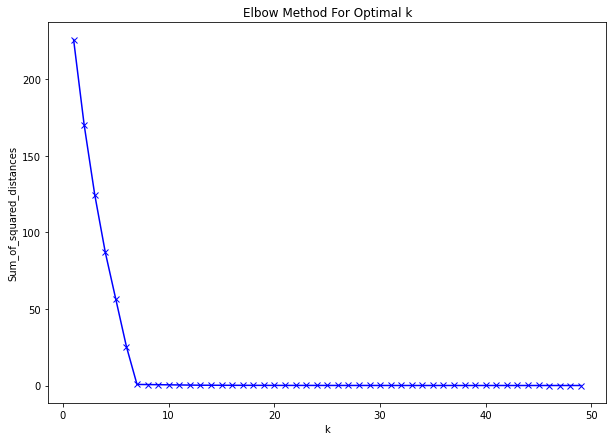

In [34]:
plt.figure(figsize=(10,7))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.savefig('elbow.png')
plt.show()

In [35]:
X = np.array(tran.drop(['book_rating'], 1).astype(float))

In [36]:
y = np.array(tran['book_rating'])

In [37]:
tran[["book_title", "book_rating"]].groupby(['book_title'], as_index=False).mean().sort_values(by='book_title', ascending=True).tail()

,book_title,book_rating
2,2,3.94
3,3,4.34
4,4,4.54
5,5,4.56
6,6,4.44


#### b. Mencoba K-means Clustering dengan k=5 dan max iterasi=300

In [38]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

KMeans(n_clusters=5)

In [39]:
KMeans(algorithm='auto',copy_x=True,
       init='k-means++', max_iter=300,
       n_clusters=5, n_init=10,
       n_jobs=1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(n_clusters=5, n_jobs=1, precompute_distances='auto')

In [40]:
# model melakukan clustering secara tepat dengan akurasi 0.0056
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.0


#### c. Mencoba K-means Clustering dengan k=5 dan max iterasi=600

In [41]:
kmeans = kmeans = KMeans(n_clusters=5, max_iter=600, algorithm = 'auto')
kmeans.fit(X)

KMeans(max_iter=600, n_clusters=5)

In [42]:
KMeans(algorithm='auto', copy_x=True,
       init='k-means++', max_iter=600,
       n_clusters=5, n_init=10,
       n_jobs=1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(max_iter=600, n_clusters=5, n_jobs=1, precompute_distances='auto')

In [43]:
# range di value tidak di perhitungkan
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.0


#### d. Mencoba K-means Clustering dengan k=5, max iterasi=600 namun range data sudah di scale

In [44]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [45]:
kmeans.fit(X_scaled)

KMeans(max_iter=600, n_clusters=5)

In [46]:
KMeans(algorithm='auto', copy_x=True,
       init='k-means++', max_iter=600,
       n_clusters=5, n_init=10,
       n_jobs=1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(max_iter=600, n_clusters=5, n_jobs=1, precompute_distances='auto')

In [47]:
# akurasi semakin mengecil karena index yg digunakan sangat beragam
# menyebabkan jumlah clustering harus semakin byk
# namun hanya membatasi sebanyak k=5 yg mengakibatkan akurasi rendah
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.0


### Using Agglomerative Clustering

In [48]:
data.dtypes

index            int64
book_title      object
review          object
book_rating    float64
ID               int64
dtype: object

In [49]:
numerical_vars = ['book_rating','ID']

<Figure size 864x864 with 0 Axes>

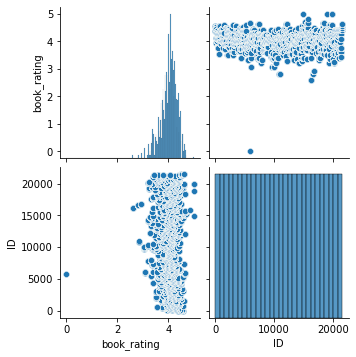

In [50]:
plt.figure(figsize=(12, 12))
_ = sns.pairplot(data=data[numerical_vars], kind='scatter')
#plt.savefig('scatter numerical.png')
plt.show()

In [51]:
train, test = train_test_split(data, test_size = 0.2, random_state = 0)

In [52]:
print("Jumlah data: {0}".format(data.shape))
print("Jumlah data train: {0}".format(train.shape))
print("Jumlah data test: {0}".format(test.shape))

Jumlah data: (21559, 5)
Jumlah data train: (17247, 5)
Jumlah data test: (4312, 5)


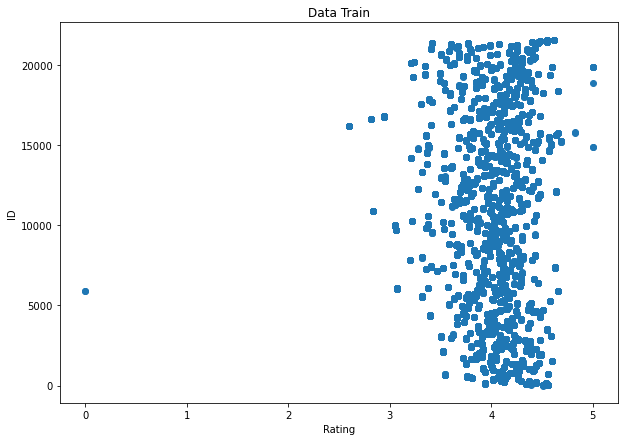

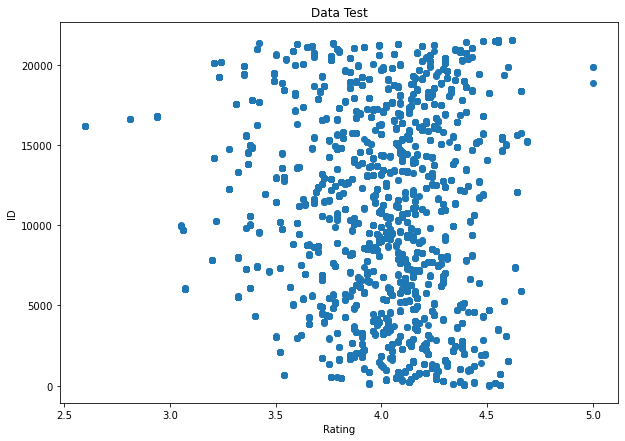

In [53]:
data_train = train[["ID", "book_rating"]]
data_test = test[["ID", "book_rating"]]

#Visualise data points
plt.figure(figsize=(10, 7))
plt.title("Data Train")
plt.scatter(data_train["book_rating"], data_train["ID"])
plt.xlabel('Rating')
plt.ylabel('ID')
#plt.savefig('data train.png')
plt.show()

plt.figure(figsize=(10, 7))
plt.title("Data Test")
plt.scatter(data_test["book_rating"], data_test["ID"])
plt.xlabel('Rating')
plt.ylabel('ID')
#plt.savefig('data test.png')
plt.show()

In [54]:
train = train.set_index('book_title')

In [55]:
X_train = train.iloc[:200, [2, 3]]
X_train.head()

,book_rating,ID
book_title,,
wives of war,4.06,20664
legion,4.10,14560
carve the mark,3.76,549
at attention,4.02,9570
the hot one,3.94,6485


In [56]:
#standardizing the data
sltd_data = X_train
scaler = StandardScaler()
data_scaled = scaler.fit_transform(sltd_data)

#statistics of scaled data
pd.DataFrame(data_scaled).describe()

,0,1
count,2.000000e+02,2.000000e+02
mean,-1.541545e-15,-7.938095e-17
std,1.002509e+00,1.002509e+00
min,-3.844041e+00,-1.749084e+00
25%,-5.604431e-01,-7.845532e-01
50%,1.409078e-01,4.725307e-02
75%,6.191016e-01,8.658033e-01
max,1.989924e+00,1.769225e+00


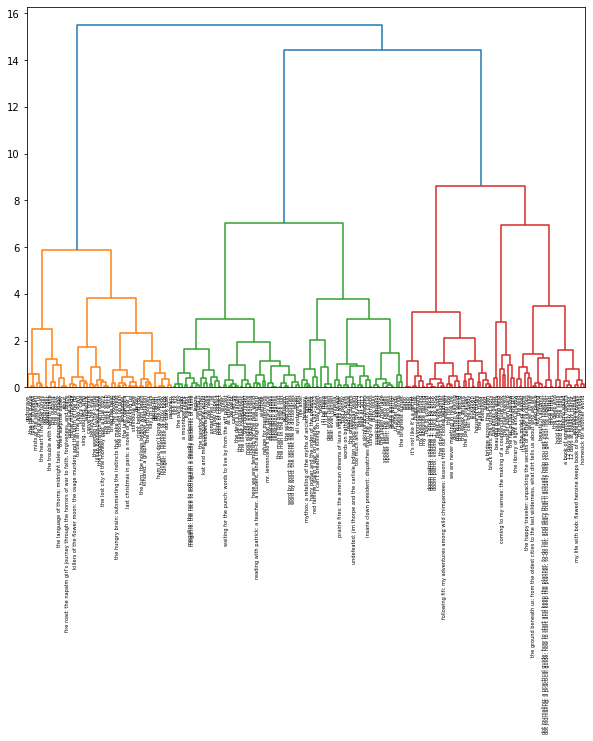

In [57]:
#create dendrogram
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(data_scaled,
                                        method='ward',
                                        metric='euclidean',
                                        optimal_ordering=False),
                            labels=list(X_train.index),
                            leaf_rotation=90)

#create clusters
hc = AgglomerativeClustering(n_clusters=3,
                             affinity = 'euclidean',
                             linkage='ward')

#save clusters for chart
y_hc = hc.fit_predict(data_scaled)
#plt.savefig('dendogram2.png')

In [58]:
cluster_train = AgglomerativeClustering(n_clusters=7,
                                        affinity='euclidean',
                                        linkage='ward')
cluster_train.fit_predict(data_scaled)

array([2, 4, 0, 4, 3, 3, 4, 2, 6, 4, 4, 4, 4, 6, 1, 1, 4, 1, 2, 2, 6, 5,
       4, 5, 4, 2, 4, 0, 1, 0, 1, 4, 2, 4, 2, 3, 2, 0, 1, 2, 6, 3, 4, 4,
       3, 0, 6, 3, 0, 3, 4, 2, 3, 0, 2, 1, 1, 1, 6, 6, 0, 3, 4, 0, 4, 4,
       3, 3, 2, 1, 4, 2, 2, 4, 4, 4, 6, 2, 4, 3, 6, 1, 2, 1, 6, 4, 3, 2,
       2, 2, 1, 0, 0, 1, 1, 6, 4, 3, 4, 5, 0, 3, 0, 3, 3, 4, 0, 0, 2, 3,
       4, 2, 1, 3, 3, 1, 1, 0, 0, 4, 4, 5, 4, 0, 0, 2, 0, 4, 0, 5, 2, 4,
       3, 3, 0, 0, 1, 2, 0, 4, 2, 4, 0, 2, 2, 2, 4, 0, 4, 1, 1, 0, 6, 1,
       0, 0, 0, 0, 3, 2, 4, 4, 0, 3, 3, 2, 3, 0, 4, 2, 3, 2, 4, 3, 1, 0,
       3, 6, 3, 6, 2, 5, 2, 3, 6, 0, 0, 5, 2, 4, 2, 2, 1, 4, 3, 4, 0, 1,
       5, 4], dtype=int64)

In [59]:
X_train.head()

,book_rating,ID
book_title,,
wives of war,4.06,20664
legion,4.10,14560
carve the mark,3.76,549
at attention,4.02,9570
the hot one,3.94,6485


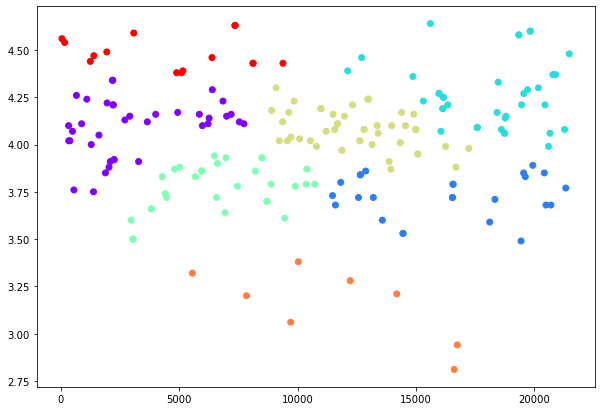

In [60]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train['ID'], X_train['book_rating'],
            c=cluster_train.labels_, cmap='rainbow')
#plt.savefig('scatter train.png')

In [61]:
test.head()

,index,book_title,review,book_rating,ID
1985,1985,stay,5 peaches stars never mistake broken weak read...,4.39,1986
14933,14933,some kind of magic,perfection addicting consuming much fun oh lov...,3.78,14934
4777,4777,ride the storm,ok first book better b coming april 2016 like ...,4.15,4778
18889,18889,the spanish exile,received book free intention review effect opi...,3.85,18890
13803,13803,"jane, unlimited",book starts tight packed strange bristling spi...,3.37,13804


In [62]:
test = test.set_index('book_title')

In [63]:
X_test = test.iloc[:200, [2, 3]]
X_test.head()

,book_rating,ID
book_title,,
stay,4.39,1986
some kind of magic,3.78,14934
ride the storm,4.15,4778
the spanish exile,3.85,18890
"jane, unlimited",3.37,13804


In [64]:
#standardizing the data
sltd_data2 = X_test
scaler2 = StandardScaler()
data_scaled2 = scaler2.fit_transform(sltd_data2)

#statistics of scaled data
pd.DataFrame(data_scaled2).describe()

,0,1
count,2.000000e+02,2.000000e+02
mean,-8.454348e-16,-1.010303e-16
std,1.002509e+00,1.002509e+00
min,-3.311876e+00,-1.861712e+00
25%,-5.378024e-01,-8.905727e-01
50%,9.057887e-02,1.942784e-01
75%,6.499915e-01,8.503533e-01
max,2.052355e+00,1.684361e+00


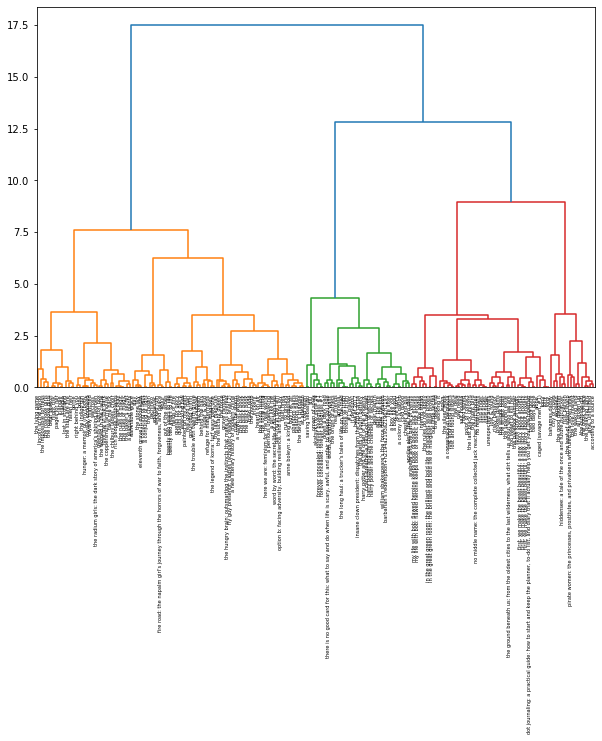

In [65]:
#create dendrogram
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(data_scaled2,
                                        method='ward',
                                        metric='euclidean',
                                        optimal_ordering=False),
                            labels=list(X_test.index),
                            leaf_rotation=90)

#create clusters
hc = AgglomerativeClustering(n_clusters=3,
                             affinity = 'euclidean',
                             linkage='ward')

#save clusters for chart
y_hc = hc.fit_predict(data_scaled)
#plt.savefig('dendogram3.png')

In [66]:
cluster_test = AgglomerativeClustering(n_clusters=6,
                                       affinity='euclidean',
                                       linkage='ward')
cluster_test.fit_predict(data_scaled2)

array([5, 3, 2, 3, 4, 1, 3, 3, 4, 2, 2, 2, 3, 1, 3, 0, 5, 4, 2, 0, 2, 3,
       0, 3, 3, 0, 5, 3, 2, 0, 3, 3, 3, 3, 2, 3, 0, 2, 5, 3, 0, 2, 2, 1,
       3, 2, 0, 4, 0, 5, 0, 1, 1, 5, 4, 0, 1, 0, 0, 2, 2, 3, 0, 3, 1, 1,
       3, 1, 0, 4, 2, 0, 4, 1, 0, 0, 0, 2, 3, 2, 0, 4, 3, 2, 4, 3, 1, 3,
       5, 1, 5, 0, 3, 2, 2, 0, 5, 5, 2, 1, 4, 1, 0, 2, 2, 0, 4, 2, 1, 3,
       0, 2, 3, 4, 3, 5, 2, 3, 1, 2, 2, 1, 3, 1, 0, 4, 1, 3, 2, 1, 3, 2,
       0, 2, 0, 3, 2, 5, 4, 3, 2, 1, 2, 2, 3, 0, 1, 2, 1, 1, 1, 3, 2, 3,
       0, 0, 2, 2, 1, 1, 0, 0, 2, 0, 1, 3, 3, 3, 1, 0, 2, 1, 3, 3, 3, 4,
       2, 3, 0, 1, 1, 2, 2, 3, 0, 2, 3, 5, 5, 4, 3, 5, 3, 1, 3, 2, 3, 2,
       0, 1], dtype=int64)

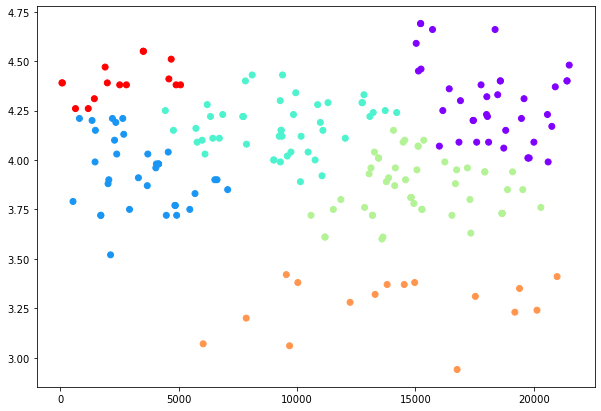

In [67]:
plt.figure(figsize=(10, 7))
plt.scatter(X_test['ID'], X_test['book_rating'],
            c=cluster_test.labels_, cmap='rainbow')
#plt.savefig('scatter test.png')

In [68]:
cluster = data.groupby("book_rating")["review"].apply(list)
cluster = pd.DataFrame(cluster)
cluster.to_csv("dfReview.csv")
cluster1 = pd.read_csv("dfReview.csv")

In [69]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=500,
        max_font_size=30, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin;
                       # it was heads
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(8, 8))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

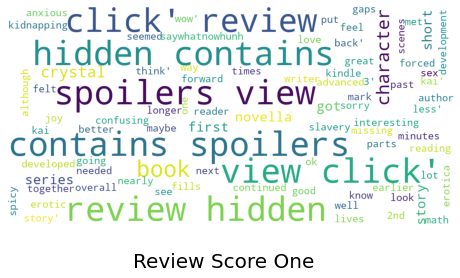

In [70]:
show_wordcloud(cluster1["review"][1], title = "Review Score One")

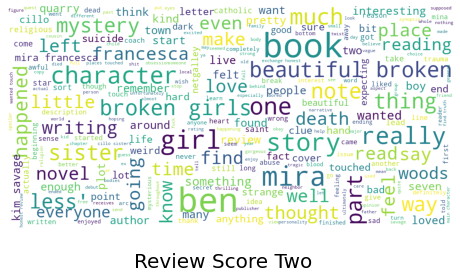

In [71]:
show_wordcloud(cluster1["review"][2], title = "Review Score Two")

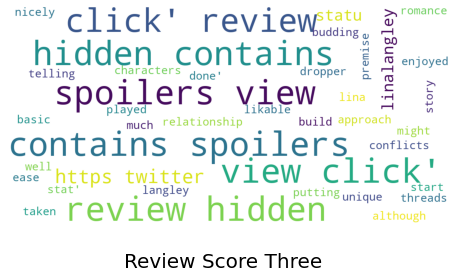

In [72]:
show_wordcloud(cluster1["review"][3], title = "Review Score Three")

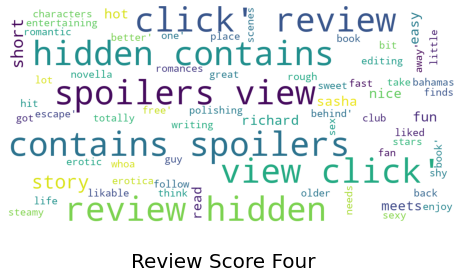

In [73]:
show_wordcloud(cluster1["review"][4], title = "Review Score Four")

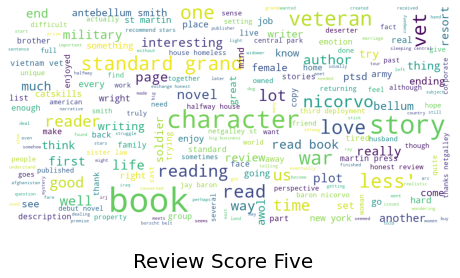

In [74]:
show_wordcloud(cluster1["review"][5], title = "Review Score Five")

## 5. Evaluation

In [75]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt 
from sklearn.metrics.cluster import silhouette_score

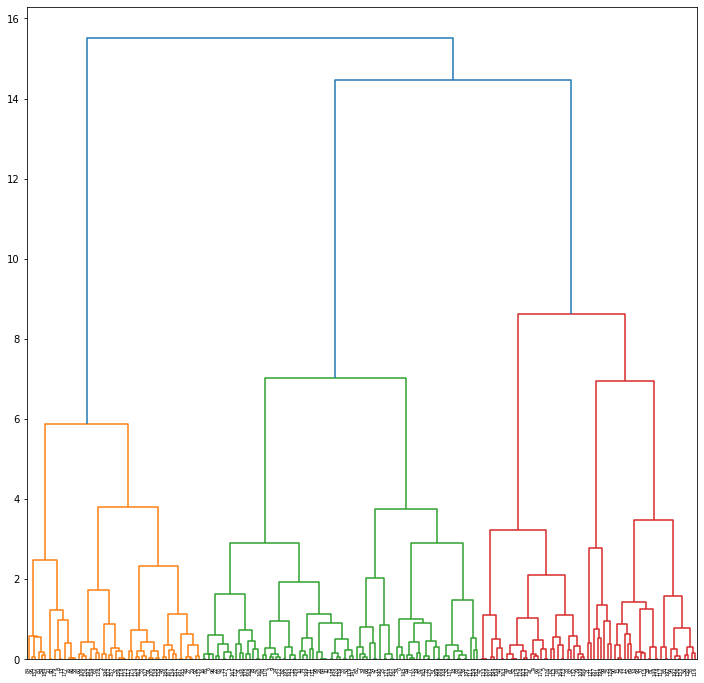

In [76]:
#create dendrogram
plt.figure(figsize=(12,12))
dendrogram = sch.dendrogram(sch.linkage(data_scaled, method='ward',
                                        metric='euclidean',
                                        optimal_ordering=False))

#create clusters
hc = AgglomerativeClustering(n_clusters=3,
                             affinity = 'euclidean',
                             linkage='ward')

#save clusters for chart
y_hc = hc.fit_predict(data_scaled)
#plt.savefig('dendogram.png')

Text(0.5, 1.0, 'Silhoutte Score : 0.31')

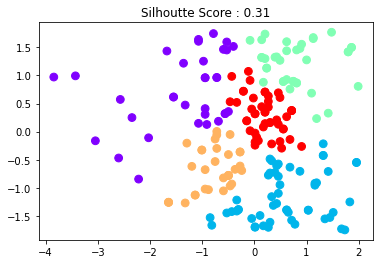

In [77]:
algs= AgglomerativeClustering(n_clusters=5)
clusters = algs.fit_predict(data_scaled)
#plt.figure(figsize=(12,12))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters, cmap='rainbow', s=60)
plt.title("Silhoutte Score : %.2f" % (silhouette_score(data_scaled, clusters)))
#plt.savefig('silhouette.png')
#plt.show()

In [78]:
np.where(clusters == 0)

(array([ 14,  15,  17,  21,  23,  28,  30,  38,  55,  56,  57,  69,  81,
         83,  90,  93,  94,  99, 112, 115, 116, 121, 129, 136, 149, 150,
        153, 174, 181, 187, 192, 197, 198], dtype=int64),)

In [79]:
np.where(clusters == 1)

(array([  2,   8,  13,  20,  27,  29,  37,  40,  45,  46,  48,  53,  58,
         59,  60,  63,  76,  80,  84,  91,  92,  95, 100, 102, 106, 107,
        117, 118, 123, 124, 126, 128, 134, 135, 138, 142, 147, 151, 152,
        154, 155, 156, 157, 162, 167, 175, 177, 179, 184, 185, 186, 196],
       dtype=int64),)